In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Datasets/UNSW_NB15_training-set.csv')
df.drop(['id'], axis = 'columns' , inplace = True)

In [5]:
df.drop_duplicates(keep='first',inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175267,1.914309,tcp,smtp,FIN,74,30,69997,2132,53.805315,62,...,1,1,0,0,0,18,1,0,Exploits,1
175277,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,62,...,1,1,0,0,0,2,1,0,Exploits,1
175299,0.996503,tcp,pop3,FIN,20,30,942,16684,49.171955,62,...,1,1,0,0,0,7,1,0,Exploits,1
175305,1.557125,tcp,smtp,FIN,28,22,12601,1954,31.468251,62,...,1,2,0,0,0,2,1,0,Exploits,1


In [5]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [16]:
df.groupby('proto')['proto'].count()

proto
3pc          100
a/n          100
aes-sp3-d    100
any          300
argus         98
            ... 
wsn          100
xnet          99
xns-idp       99
xtp          100
zero         100
Name: proto, Length: 133, dtype: int64

In [15]:
df.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [7]:
df1 = pd.DataFrame(df.groupby(['attack_cat'])['attack_cat'].count())
df2 = pd.DataFrame(df.groupby(['label'])['label'].count())


In [8]:
def autolabel1(rects,ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),ha='center', va='bottom',fontsize=10)


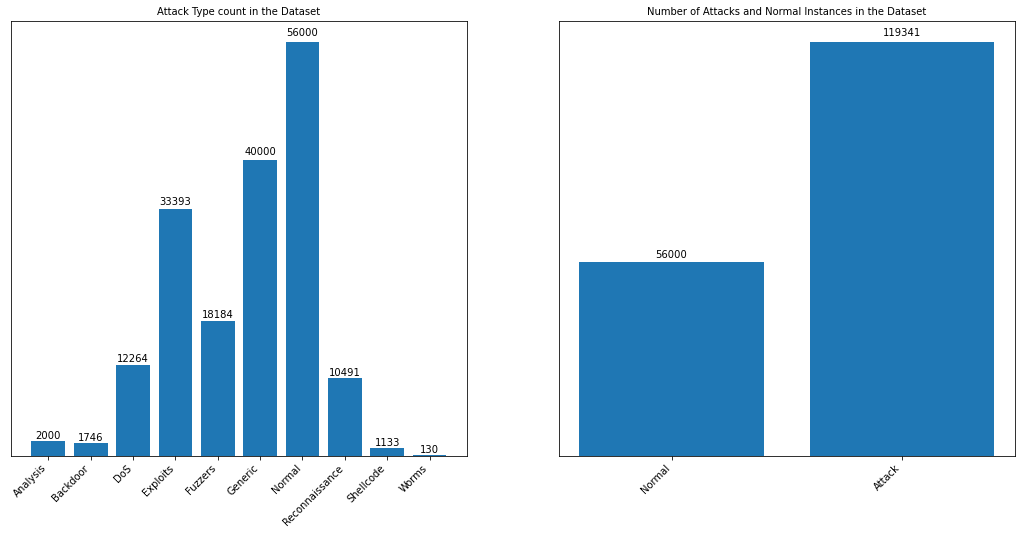

In [11]:
attack_cat = []
label = []
plot = []
attack_cat_labels = ['Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Normal','Reconnaissance','Shellcode','Worms']
class_labels = ['Normal','Attack']

for i in range(0,len(df1['attack_cat'])):
    attack_cat.append(df1['attack_cat'].values[i])
for i in range(0,len(df2['label'])):
    label.append(df2['label'].values[i])

fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,8))
    
pl1 = ax1.bar(np.arange(len(df1['attack_cat'])), attack_cat)
ax1.set_xticks(np.arange(len(attack_cat_labels)))
ax1.set_xticklabels(labels=attack_cat_labels,rotation=45,ha='right')
ax1.set_yticks([])
ax1.set_title('Attack Type count in the Dataset',fontsize=10)
autolabel1(pl1,ax1)

pl2 = ax2.bar(np.arange(len(df2['label'])), label)
ax2.set_xticks(np.arange(len(class_labels)))
ax2.set_xticklabels(labels=class_labels,rotation=45,ha='right')
ax2.set_yticks([])
ax2.set_title('Number of Attacks and Normal Instances in the Dataset',fontsize=10)
autolabel1(pl2,ax2)



In [13]:
df.groupby('attack_cat')['attack_cat'].count()

attack_cat
Analysis           2000
Backdoor           1746
DoS               12264
Exploits          33393
Fuzzers           18184
Generic           40000
Normal            56000
Reconnaissance    10491
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [ ]:
n_proto = []
a_proto = []
n_service = []
a_service = []
n_state = []
a_state = []
n_attack_cat = []
a_attack_cat = []


for i in range(0,7):
    f_death.append(df_new['Deaths'].values[i])
    l_death.append(df_new['Deaths'].values[i+7])
    
for i in range(0,7):
    f_injured.append(df_new['Injured'].values[i])
    l_injured.append(df_new['Injured'].values[i+7])
    
for i in range(0,7):
    f_h_destoyed.append(df_new['Houses Destroyed'].values[i])
    l_h_destoyed.append(df_new['Houses Destroyed'].values[i+7])
    
for i in range(0,7):
    f_h_damaged.append(df_new['Houses Damaged'].values[i])
    l_h_damaged.append(df_new['Houses Damaged'].values[i+7])
    
lst1 = [f_death,f_injured,f_h_destoyed,f_h_damaged]
lst2 = [l_death,l_injured,l_h_destoyed,l_h_damaged]

width =0.3
plots1=[]
plots2=[]
names = ['Deaths','Injured','Houses Destroyed','Houses Damaged']
provinces = ['Central','North-Central','North-Western','Sabaragamuwa','Southern','Uva','Western']

fig, axes = plt.subplots(2,2,figsize=(10,10))  
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i,ax in enumerate(axes):
    plots1.append(axes[i].bar(np.arange(len(lst1[i])), lst1[i], width=width,label='Flood'))
    plots2.append(axes[i].bar(np.arange(len(lst2[i]))+ width, lst2[i], width=width , label='Landslide'))
    axes[i].set_xticks(np.arange(len(lst[0])) + width / 2)
    axes[i].set_xticklabels(labels = provinces, fontsize = 10, rotation = 45)
    axes[i].legend(loc='best')
    axes[i].set_yticks([])
    axes[i].set_title('Resuls of Floods and Landslides : {}'.format(names[i]),fontsize=10)
    autolabel1(plots1[i],axes[i])
    autolabel1(plots2[i],axes[i])

In [8]:
df_test = pd.read_csv('Datasets/UNSW_NB15_testing-set.csv')
df_test.drop(['id'], axis = 'columns' , inplace = True)
df_test.drop_duplicates(keep='first',inplace=True)
df_test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82319,0.811914,tcp,-,FIN,10,6,588,268,18.474862,254,...,1,4,0,0,0,1,4,0,Normal,0
82322,0.000004,udp,-,INT,2,0,104,0,250000.000600,254,...,1,1,0,0,0,1,1,0,Normal,0
82323,5.167410,tcp,-,FIN,108,24,138067,1042,25.351192,254,...,1,1,0,0,0,1,3,0,Normal,0
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0


In [9]:
df_new = pd.concat([df,df_test],axis=0)
df_new

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82319,0.811914,tcp,-,FIN,10,6,588,268,18.474862,254,...,1,4,0,0,0,1,4,0,Normal,0
82322,0.000004,udp,-,INT,2,0,104,0,250000.000600,254,...,1,1,0,0,0,1,1,0,Normal,0
82323,5.167410,tcp,-,FIN,108,24,138067,1042,25.351192,254,...,1,1,0,0,0,1,3,0,Normal,0
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0


In [11]:
df_new.drop_duplicates(keep='first',inplace=True)

In [12]:
df_new.duplicated().sum()

0

In [13]:
limit = df_new.shape[1]-1
    
X = df_new.iloc[:,0:limit] # train set features
Y = df_new.iloc[:,limit]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_X, test_X , train_Y , test_Y = train_test_split(X, Y, test_size=0.2,shuffle=False)

print('Training X :',train_X.shape)
print('Test_X :',test_X.shape)
print('Training_Y :',train_Y.shape)
print('Test_Y :',test_Y.shape)

Training X : (130196, 43)
Test_X : (32549, 43)
Training_Y : (130196,)
Test_Y : (32549,)


In [14]:
train_X

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37386,0.019862,tcp,-,FIN,46,48,2854,30622,4682.307948,31,...,1,1,1,0,0,0,2,9,0,Normal
37387,0.116920,tcp,-,FIN,84,86,4862,77276,1445.432752,31,...,1,1,2,0,0,0,4,12,0,Normal
37388,1.253688,tcp,smtp,FIN,52,42,37268,3380,74.181137,31,...,1,1,1,0,0,0,1,1,0,Normal
37389,1.949500,tcp,-,FIN,237,427,13593,536570,340.087208,31,...,1,1,1,0,0,0,5,7,0,Normal


In [13]:
type(train_X)

numpy.ndarray

In [16]:
df_train = pd.concat([train_X,train_Y],axis=1)
df_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37386,0.019862,tcp,-,FIN,46,48,2854,30622,4682.307948,31,...,1,1,0,0,0,2,9,0,Normal,0
37387,0.116920,tcp,-,FIN,84,86,4862,77276,1445.432752,31,...,1,2,0,0,0,4,12,0,Normal,0
37388,1.253688,tcp,smtp,FIN,52,42,37268,3380,74.181137,31,...,1,1,0,0,0,1,1,0,Normal,0
37389,1.949500,tcp,-,FIN,237,427,13593,536570,340.087208,31,...,1,1,0,0,0,5,7,0,Normal,0


In [19]:
df_train.duplicated().sum()

0

In [18]:
df_train.reset_index(drop=True,inplace=True)
df_train.reset_index(inplace=True)


In [20]:
df_train.to_csv('USNW_train-set.csv')
df_train.head()

,index,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [21]:
df_test = pd.concat([test_X,test_Y],axis=1)
df_test.reset_index(drop=True,inplace=True)
df_test.reset_index(inplace=True)
df_test.to_csv('USNW_test-set.csv')
df_test.head()

,index,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0.001077,udp,dns,CON,2,2,146,178,2785.515187,...,1,1,0,0,0,6,2,0,Normal,0
1,1,0.000967,udp,dns,CON,2,2,146,178,3102.378397,...,1,1,0,0,0,1,3,0,Normal,0
2,2,0.498803,tcp,smtp,FIN,52,42,37268,3380,186.446356,...,1,1,0,0,0,2,1,0,Normal,0
3,3,1.009869,tcp,http,FIN,14,18,1684,10168,30.697051,...,1,1,0,0,1,11,2,0,Normal,0
4,4,0.001080,udp,dns,CON,2,2,146,178,2777.777885,...,1,1,0,0,0,3,7,0,Normal,0


In [23]:
df_train.duplicated().sum()

0